In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import math
import missingno as msno

from scipy.stats import f_oneway
import pickle

from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import mean_squared_error

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from matplotlib import pyplot

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (100,100)
plt.rc('font', size=50)


# Getting Data and Separating Test/Train and Class

In [2]:
Data = pd.read_csv('Data/Pneumonia_Data_48h/24h-48h/24h-48h_Mortality_PreProcessed_Data_StandardScale_Cleaned.csv')

In [3]:
len(Data.columns)

65

In [4]:
len(Data)

2729

In [5]:
Data.head()

,Age,Gender,Weight,HeartRate,TAS,TAD,Temperature,RR,SpO2,Lactate,PaCO2,pH,SaO2,metHb,BE,APTT,AST/TGO,Tbilirubin,DHL,AlkalinePhosph,Phosphorus,GGT,Hemoglobin,I.N.R,Leukocytes,Lymphocytes,Magnesium,Neutrophils,PCR,Platelets,Potassium,Sodium,Urea,Glasgow,AddicIntoxic,VascularP,TVP/TEP,Pneumothorax,AAbdomen,CerebrovasculaP,Coma,AcidBaseC,Encephalopathy,Anemia,MultiorganD,PolyneuroMyopathy,Tracheobronchitis,Obesity,ITU,HemorrhagicCerebroP,Coagulopathy,Sepsis,Nephro/IRC,Alcoholism,Smoking,Dyslipidemia,Arrhythmias,Diabetes,NIHeartDisease,Shock,RenalFailure,Hypertension,NIVUD,IMVUD,Mortality
0,0.006481,-0.686438,0.069274,-0.486473,1.098887,0.590664,1.055836,-0.046043,0.349353,-0.867199,-0.365546,1.324670,-0.637208,1.365303,0.974056,-0.937705,-1.838641,-0.501150,-0.935316,0.113930,-1.153605,0.333634,-0.024084,0.385854,-0.841407,0.364156,-0.053073,-0.074460,-1.236705,-0.109234,-1.305071,1.302366,0.555541,1.453192,-0.138177,6.405727,-0.155443,-0.165517,-0.180412,-0.182742,-0.176867,-0.164566,-0.185047,-0.18361,-0.176867,-0.204514,-0.21482,-0.212027,4.459387,4.538911,-0.224733,-0.215324,4.564592,-0.236183,-0.326350,-0.326722,-0.381894,2.627919,-0.392389,-0.424289,-0.453053,1.859516,2.027421,-0.747955,0.0
1,-0.327977,-0.686438,0.540062,0.332892,-0.928519,-0.472900,-0.598998,0.746717,0.349353,1.161667,-0.252980,-1.175212,-0.072847,-1.242004,-1.426185,0.514787,2.269696,1.626337,2.069866,1.282337,1.000166,1.760151,0.998693,-0.624169,-2.017358,-0.929793,0.183582,0.538497,-0.399801,-1.218457,1.481452,-1.159070,1.242041,1.453192,-0.138177,-0.156110,-0.155443,-0.165517,-0.180412,-0.182742,-0.176867,-0.164566,-0.185047,-0.18361,5.653965,-0.204514,-0.21482,-0.212027,-0.224246,-0.220317,-0.224733,-0.215324,-0.219078,-0.236183,-0.326350,-0.326722,2.618530,-0.380529,2.548490,2.356885,2.207248,1.859516,-0.493237,-0.747955,1.0
2,0.668620,-0.686438,-1.248933,-0.267493,0.643755,1.039277,0.346621,-0.907104,1.299887,1.101081,0.168645,0.949687,-1.037806,0.930408,1.237892,-0.430825,-1.680185,-0.813569,-0.543619,-0.482341,-0.371121,-0.866725,-0.379833,-0.624169,-0.642056,-0.825598,-0.567836,0.378883,0.263411,-0.390492,-1.407016,0.071648,-1.427375,1.453192,-0.138177,-0.156110,-0.155443,-0.165517,-0.180412,-0.182742,-0.176867,-0.164566,-0.185047,-0.18361,-0.176867,-0.204514,-0.21482,-0.212027,-0.224246,-0.220317,-0.224733,-0.215324,-0.219078,4.234009,3.064195,-0.326722,-0.381894,-0.380529,-0.392389,-0.424289,-0.453053,-0.537774,-0.493237,1.336978,0.0
3,0.302783,-0.686438,-0.166120,0.425770,-0.349260,-1.198556,0.819431,-0.747231,0.594002,0.321678,-1.141759,-0.225257,0.947843,0.708272,-1.069923,1.322729,-0.046152,1.778141,0.131440,-0.267153,1.117327,-0.580672,-0.868988,1.260483,1.460987,-0.321765,-0.567836,0.343386,-1.417054,-1.294338,-0.370566,0.599099,1.393739,-0.946983,-0.138177,-0.156110,-0.155443,-0.165517,-0.180412,-0.182742,-0.176867,-0.164566,-0.185047,-0.18361,-0.176867,-0.204514,-0.21482,-0.212027,-0.224246,-0.220317,-0.224733,-0.215324,-0.219078,4.234009,-0.326350,-0.326722,-0.381894,-0.380529,-0.392389,2.356885,-0.453053,-0.537774,-0.493237,1.336978,1.0
4,-0.474987,-0.686438,0.304668,-2.593655,1.678145,-0.321630,-0.717200,-1.642146,-1.654269,0.321678,-0.143423,0.074729,-0.665669,0.783839,0.024750,0.122235,-0.697543,-0.329929,-0.902743,-0.771754,-1.712521,-0.968385,0.598476,-0.059811,0.192314,-0.269439,0.183582,0.245720,0.588849,-0.361622,-0.098710,0.599099,0.083369,1.275528,-0.138177,-0.156110,-0.155443,-0.165517,-0.180412,-0.182742,-0.176867,-0.164566,-0.185047,-0.18361,-0.176867,-0.204514,-0.21482,-0.212027,-0.224246,4.538911,-0.224733,-0.215324,-0.219078,-0.236183,-0.326350,-0.326722,2.618530,2.627919,-0.392389,-0.424289,-0.453053,1.859516,-0.493237,1.336978,0.0


In [6]:
LR_Data = Data.copy()

In [7]:
len(LR_Data)

2729

Separating the class feature and separating train and test data

In [8]:
X_data = LR_Data[LR_Data.columns[:-1]]
Y_data = pd.DataFrame({'Mortality':LR_Data['Mortality']})

In [9]:
print(Counter(Y_data['Mortality']))

Counter({0.0: 2257, 1.0: 472})


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=1, stratify=Y_data)

print(Counter(y_train['Mortality']))
print(Counter(y_test['Mortality']))

Counter({0.0: 1512, 1.0: 316})
Counter({0.0: 745, 1.0: 156})


In [11]:
y_train = y_train['Mortality'].copy()
y_test = y_test['Mortality'].copy()
#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

#### From now on the code will be divided into two studies, one with oversampling and one without

# Eliminating Features via Logistic Regression RFE

>10 0.5908 (0.0304)
>15 0.6084 (0.0458)
>20 0.6201 (0.0475)
>25 0.6252 (0.0400)
>30 0.6303 (0.0413)
>35 0.6258 (0.0399)
>40 0.6296 (0.0392)
>45 0.6267 (0.0409)
>50 0.6292 (0.0422)
>55 0.6267 (0.0401)
>60 0.6260 (0.0401)
>64 0.6260 (0.0401)


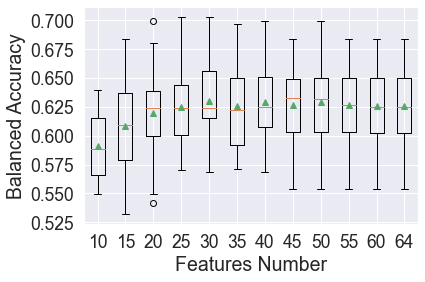

In [12]:
sns.set(rc={"figure.figsize":(20, 9)})

# get a list of models to evaluate
models = dict()
for i in [10,15,20,25,30,35,40,45,50,55,60,64]:
   # A machine learning model to selecting the features by eliminating the least important feature after recursively training
   rfe = RFE(estimator=LogisticRegression(max_iter=300), n_features_to_select=i)
   model = LogisticRegression(random_state = 0)
   models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate the models and store results
results, names = list(), list()
results_mean = list()
for name, model in models.items():
   # scoring='balanced_accuracy' because the data is unbalenced
   scores = cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=10, n_jobs=-1, error_score='raise')
   results.append(scores)
   results_mean.append(scores.mean())
   names.append(name)
   print('>%s %.4f (%.4f)' % (name, scores.mean(), scores.std()))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

pyplot.ylabel('Balanced Accuracy', fontsize=19.5)
pyplot.xlabel('Features Number', fontsize=19.5)
pyplot.yticks(fontsize = 17.5)
pyplot.xticks(fontsize = 17.5)

#pyplot.savefig('RFE')
pyplot.show()

In [13]:
# Choose the best number of features as discovered from before 
# Here I choose a threshold of 0.01 of difference in accuracy

results_names = list(zip(results_mean[1:], names[1:]))

score_before = results_mean[0]
name_before = names[0]

for score,name in results_names[1:]:
    if score - score_before < 0.01:
        break
    else:
        score_before = score
        name_before = name

print('Number of features :', name_before)
print('Score :', score_before)

Number_of_features = int(name_before)

Number of features : 20
Score : 0.6200936702402771


In [14]:
# #Selecting the Best important features according to Logistic Regression

rfe_selector = RFE(estimator=LogisticRegression(max_iter=300),n_features_to_select = Number_of_features, step = 1)
rfe_selector.fit(X_train, y_train)
RFE_columns = X_train.columns[rfe_selector.get_support()]
print(RFE_columns)

Index(['Age', 'HeartRate', 'TAD', 'Lactate', 'PaCO2', 'metHb', 'BE', 'AST/TGO',
       'DHL', 'AlkalinePhosph', 'GGT', 'Lymphocytes', 'Platelets', 'Urea',
       'Glasgow', 'Pneumothorax', 'MultiorganD', 'PolyneuroMyopathy', 'Shock',
       'NIVUD'],
      dtype='object')


In [15]:
# Change X_train and X_test to just have the choosen columns
X_train = X_train[RFE_columns]
X_test = X_test[RFE_columns]

In [16]:
X_train.head()

,Age,HeartRate,TAD,Lactate,PaCO2,metHb,BE,AST/TGO,DHL,AlkalinePhosph,GGT,Lymphocytes,Platelets,Urea,Glasgow,Pneumothorax,MultiorganD,PolyneuroMyopathy,Shock,NIVUD
885,0.302783,-2.005568,-0.396855,-1.411539,2.039575,0.195661,-0.531748,-0.115509,-0.025627,-0.734278,-0.351211,2.852507,-0.178436,-0.084101,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,2.027421
197,-0.551803,0.693729,-1.548723,-0.640334,-0.252980,0.509726,-0.166020,-0.239192,0.262232,-0.610650,-0.720623,-1.334050,-1.390022,1.561824,0.480794,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
314,-0.257524,-0.214350,-0.627551,0.196574,-0.735469,0.445454,0.391556,-0.499841,0.049247,0.222635,-0.051309,0.534633,0.400938,0.392627,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
759,-2.136010,0.189980,-0.627551,0.196574,0.439768,-0.070718,0.931741,1.518986,1.467536,0.385894,0.415106,0.172422,-1.907574,1.140562,1.453192,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
208,-2.136010,-0.430734,-0.706206,1.101081,-0.811062,0.198899,-0.956473,-0.230956,-0.651393,-0.912344,0.236773,1.111138,-1.075785,0.476282,-0.946983,-0.165517,-0.176867,-0.204514,2.356885,-0.493237


In [17]:
X_test.head()

,Age,HeartRate,TAD,Lactate,PaCO2,metHb,BE,AST/TGO,DHL,AlkalinePhosph,GGT,Lymphocytes,Platelets,Urea,Glasgow,Pneumothorax,MultiorganD,PolyneuroMyopathy,Shock,NIVUD
330,0.946763,0.042494,-0.247203,-0.089917,-1.019654,0.421844,0.187647,0.105902,-1.020449,-0.831637,-1.807405,-0.531325,-0.277273,-0.835323,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
480,0.246140,-0.430734,-1.113908,0.196574,0.316140,0.502145,-0.178273,-0.381593,-0.176947,0.024155,-0.192087,-1.370606,1.448965,0.516432,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
2254,0.006481,-1.348681,-0.173553,-0.254908,0.728877,-1.242004,-0.858441,-0.462610,0.034335,-0.513772,0.236773,-1.263717,0.716262,0.160585,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
286,0.857195,0.650129,-1.030341,-0.254908,0.550626,1.446843,1.085981,-1.538325,-0.092194,0.489844,-0.180463,-0.357709,2.190127,-0.412990,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,2.027421
306,-2.290376,0.516820,-1.459362,1.036600,0.168645,1.274593,0.313275,-0.462610,-0.826154,-0.279873,0.378268,0.564613,-1.188998,1.204776,1.210850,-0.165517,-0.176867,4.889646,-0.424289,-0.493237


In [18]:
# Saving Data For clustering analysis

X_train.to_csv('Data/Pneumonia_Data_48h/24h-48h/For Clustering/TRAIN_24h-48h_Mortality_SS_C_important_features.csv', index=False)
np.save('Data/Pneumonia_Data_48h/24h-48h/For Clustering/TRAIN_24h-48h_Mortality_SS_C_class.npy', y_train)
X_test.to_csv('Data/Pneumonia_Data_48h/24h-48h/For Clustering/TEST_24h-48h_Mortality_SS_C_important_features.csv', index=False)
np.save('Data/Pneumonia_Data_48h/24h-48h/For Clustering/TEST_24h-48h_Mortality_SS_C_class.npy', y_test)

# Penalty and Cross Validation

In [19]:
# get penalty with the best balanced accuracy

classifier_list = ['standard', 'none', 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mean_accuracy_list = []

accuracies_df = pd.DataFrame()
n=0

for parameter in classifier_list:

    print(parameter, ':')

    if parameter == 'standard':
        classifier = LogisticRegression(max_iter=2000, random_state=0, solver='lbfgs', penalty='l2')
    elif parameter == 'none':
        classifier = LogisticRegression(max_iter=2000, random_state=0, penalty ='none', solver='saga')
    else:
        classifier = LogisticRegression(max_iter=2000, random_state=0, penalty ='elasticnet', solver='saga', l1_ratio=parameter)
    
    # scoring='balanced_accuracy' because the data is unbalenced
    all_accuracies_LR = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, scoring='balanced_accuracy')

    #print('cross_val_score: ', all_accuracies_LR)
    mean_accuracy_list.append(all_accuracies_LR.mean())
    print('Mean: ', all_accuracies_LR.mean())
    print('Standard deviation: ', all_accuracies_LR.std())
    print()

    accuracies_df[parameter] = all_accuracies_LR

standard :


Mean:  0.6238667092051855
Standard deviation:  0.04487364811889985

none :
Mean:  0.6269917092051855
Standard deviation:  0.043911049645992205

0 :
Mean:  0.6238667092051855
Standard deviation:  0.04487364811889985

0.1 :
Mean:  0.6238667092051855
Standard deviation:  0.04487364811889985

0.2 :
Mean:  0.6241956565736066
Standard deviation:  0.044847683622338555

0.3 :
Mean:  0.6241956565736066
Standard deviation:  0.044847683622338555

0.4 :
Mean:  0.6241956565736066
Standard deviation:  0.044847683622338555

0.5 :
Mean:  0.6245267824014211
Standard deviation:  0.04505666634706276

0.6 :
Mean:  0.6245267824014211
Standard deviation:  0.04505666634706276

0.7 :
Mean:  0.6245267824014211
Standard deviation:  0.04505666634706276

0.8 :
Mean:  0.6248579082292358
Standard deviation:  0.04470086618443483

0.9 :
Mean:  0.6232954082292358
Standard deviation:  0.04225994692642569

1 :
Mean:  0.6236265340570504
Standard deviation:  0.04234812796418841



In [20]:
accuracies_df.head()

,standard,none,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002,0.634002
1,0.651076,0.651076,0.651076,0.651076,0.651076,0.651076,0.651076,0.654387,0.654387,0.654387,0.654387,0.654387,0.654387
2,0.574814,0.590439,0.574814,0.574814,0.574814,0.574814,0.574814,0.574814,0.574814,0.574814,0.578125,0.578125,0.578125
3,0.699814,0.699814,0.699814,0.699814,0.699814,0.699814,0.699814,0.699814,0.699814,0.699814,0.699814,0.684189,0.684189
4,0.633071,0.648696,0.633071,0.633071,0.633071,0.633071,0.633071,0.633071,0.633071,0.633071,0.633071,0.633071,0.636382


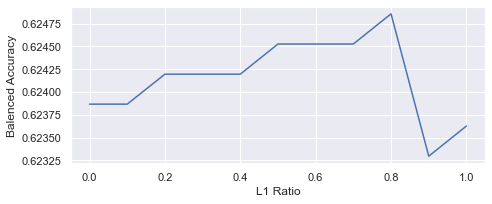

In [21]:
sns.set(rc={"figure.figsize":(20, 9)})

#l1 elasticnet l2 performance
accuracy_mean_Df = pd.DataFrame({'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'accuracy':mean_accuracy_list[2:],})

sns.set(rc={"figure.figsize":(7, 3)})
sns.lineplot(data = accuracy_mean_Df, x = 'l1_ratio', y = 'accuracy')

plt.ylabel('Balenced Accuracy')
plt.xlabel('L1 Ratio')

plt.tight_layout()
#plt.savefig('Accuracy with different l1_ratio')
plt.show()

In [22]:
l1_ratios = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

best_id = mean_accuracy_list[2:].index(max(mean_accuracy_list[2:]))


In [23]:
best_l1_ratio = l1_ratios[best_id]
print('best l1 ratio :', best_l1_ratio)

best l1 ratio : 0.8


In [24]:
accuracies_df_2 = pd.DataFrame({'standard':accuracies_df['standard'], 'saga none':accuracies_df['none'], best_l1_ratio:accuracies_df[best_l1_ratio]})

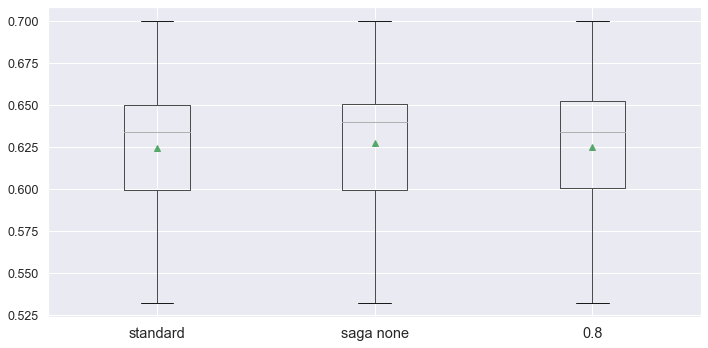

In [25]:
sns.set(rc={"figure.figsize":(10, 5)})

boxplot = accuracies_df_2.boxplot(accuracies_df_2.columns.tolist(), showmeans=True)

pyplot.yticks(fontsize = 12.5)
pyplot.xticks(fontsize = 14.5)

plt.tight_layout()
#plt.savefig('Accuracy with different solver and for no penalty')
plt.show()

In [26]:
# Performs one-way ANOVA test
# tests the null hypothesis that two or more groups have the same population mean
# if the p value is greater than 0.05, the null hypothesis is considered to be true
# This is to test if the model with the standard parameters has a substancial difference in performance from the one with the best accuracy

f_oneway_result = f_oneway(accuracies_df_2['standard'], accuracies_df_2['saga none'], accuracies_df_2[best_l1_ratio])

# Logistic Regression Model, Cost and parameters

In [27]:
# Here with the best parameter

if f_oneway_result.pvalue > 0.05:
    print('standard')
    LR_classifier = LogisticRegression(max_iter=2000, random_state=0, solver='lbfgs', penalty="l2")
else:
    print('l1 ratio')
    LR_classifier = LogisticRegression(max_iter=2000, random_state=0, penalty ='elasticnet', solver='saga', l1_ratio=parameter)
    
LR_classifier.fit(X_train, y_train)

standard


LogisticRegression(max_iter=2000, random_state=0)

In [29]:
# Get cost function plot

loss = []
coefs1 = []
coefs2 = []

for i in range(1,22):

    LR_classifier_cost = LogisticRegression(max_iter=i, random_state=0, solver='lbfgs', penalty="l2")
    LR_classifier_cost.fit(X_train, y_train)

    loss.append(log_loss(y_train, LR_classifier_cost.predict_proba(X_train)))
    coefs1.append(LR_classifier_cost.coef_[0][0])
    coefs2.append(LR_classifier_cost.coef_[0][3])

C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-l

[0.43911417582513207, 0.37613120096278563, 0.3588357884971743, 0.3540897078964528, 0.3523850047773689, 0.3520410683889832, 0.35171836285105984, 0.351670658332376, 0.351664774669522, 0.3516648351841389, 0.351664935025452, 0.3516646493380664, 0.35166463390512614, 0.3516645665037722, 0.3516645594608213, 0.3516645594608213, 0.3516645594608213, 0.3516645594608213, 0.3516645594608213, 0.3516645594608213, 0.3516645594608213]


<AxesSubplot:>

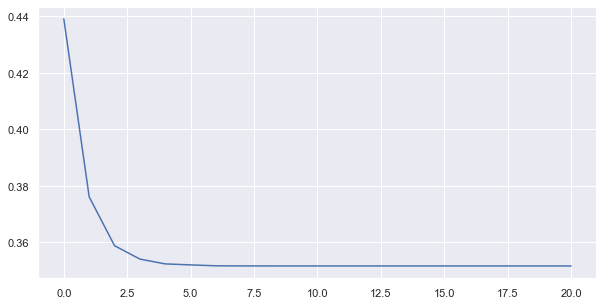

In [30]:
print(loss)
sns.lineplot(loss)

[-0.035364826098965185, -0.08604002945175175, -0.22902042370213177, -0.28337834805975964, -0.38073151575435205, -0.37751740325072647, -0.3744229767530618, -0.37473247986701785, -0.37587948890541606, -0.37625355060655685, -0.3764011913727245, -0.3763373742798625, -0.3763203094763089, -0.3763027431199068, -0.3763013047837229, -0.3763013047837229, -0.3763013047837229, -0.3763013047837229, -0.3763013047837229, -0.3763013047837229, -0.3763013047837229]


<AxesSubplot:>

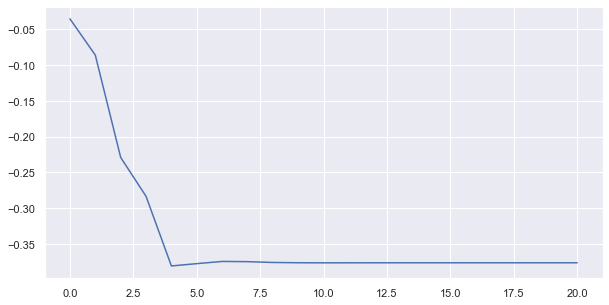

In [31]:
# coefficient 1 evolution plot

print(coefs1)
sns.lineplot(coefs1)

[0.17712172896846837, 0.14799993110750392, 0.19260260354399786, 0.2356378338294718, 0.2534124907511601, 0.2574740778252406, 0.2539122565087462, 0.2408109996268321, 0.23787376435405888, 0.23761147617890463, 0.23794753610700484, 0.23860163900099146, 0.23861342287737747, 0.2386627891054224, 0.23865835787312573, 0.23865835787312573, 0.23865835787312573, 0.23865835787312573, 0.23865835787312573, 0.23865835787312573, 0.23865835787312573]


<AxesSubplot:>

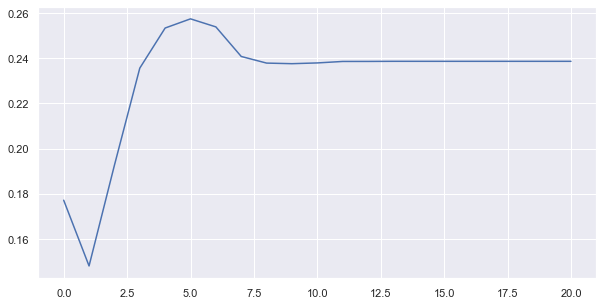

In [32]:
# coefficient 2 evolution plot

print(coefs2)
sns.lineplot(coefs2)

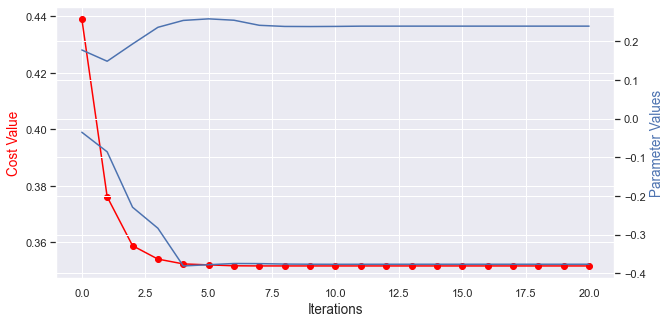

In [33]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(loss, 'o-', color="red" )
ax2.plot(coefs1, color='b')
ax2.plot(coefs2, color='b')

ax1.set_xlabel('Iterations', fontsize=13.5)
ax1.set_ylabel('Cost Value', color='red', fontsize=13.5)
ax2.set_ylabel('Parameter Values', color='b', fontsize=13.5)

#plt.tight_layout()
plt.savefig('Cost and Parameters Evolution')
plt.show()

In [34]:
# Final cross validation performances
cv = StratifiedKFold(10)

all_accuracies_RF = cross_val_score(estimator=LR_classifier, X=X_train, y=y_train, cv=cv, scoring='accuracy')
all_balanced_accuracies_RF = cross_val_score(estimator=LR_classifier, X=X_train, y=y_train, cv=cv, scoring='balanced_accuracy')
all_precisions_RF = cross_val_score(estimator=LR_classifier, X=X_train, y=y_train, cv=cv, scoring='precision')
all_recalls_RF = cross_val_score(estimator=LR_classifier, X=X_train, y=y_train, cv=cv, scoring='recall')
all_f1_RF = cross_val_score(estimator=LR_classifier, X=X_train, y=y_train, cv=cv, scoring='f1')

print('     Accuracy')
print('%6.2f' % all_accuracies_RF.mean(), 'std','%3.2f' % all_accuracies_RF.std())
print()
print('Balanced Accuracy')
print('%6.2f' % all_balanced_accuracies_RF.mean(), 'std','%3.2f' % all_balanced_accuracies_RF.std())
print()
print('    Precision')
print('%6.2f' % all_precisions_RF.mean(), 'std','%3.2f' % all_precisions_RF.std())
print()
print('     Recall')
print('%6.2f' % all_recalls_RF.mean(), 'std','%3.2f' % all_recalls_RF.std())
print()
print('    F1-score')
print('%6.2f' % all_f1_RF.mean(), 'std','%3.2f' % all_f1_RF.std())
print()

     Accuracy
  0.85 std 0.02

Balanced Accuracy
  0.62 std 0.04

    Precision
  0.65 std 0.16

     Recall
  0.28 std 0.09

    F1-score
  0.38 std 0.11



# Performance on Test Dataset

In [35]:
# Here we have to use LR_classifier.predict_proba(X_test)[:,1] and not y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, LR_classifier.predict_proba(X_test)[:,1], pos_label=1)
auc_roc = metrics.auc(fpr, tpr)
auc_roc

0.7800378592324901

In [36]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('optimal idx :', optimal_idx)
print('optimal threshold :', optimal_threshold)
print('tpr optimal idx:', tpr[optimal_idx])
print('fpr optimal idx:', fpr[optimal_idx])

optimal idx : 128
optimal threshold : 0.1545367960550538
tpr optimal idx: 0.7371794871794872
fpr optimal idx: 0.27248322147651005


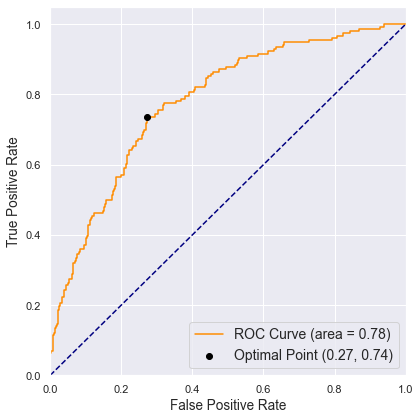

In [37]:
sns.set(rc={"figure.figsize":(6, 6)})

plt.plot(fpr, tpr, color='darkorange',
         label='ROC Curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter([fpr[optimal_idx]], [tpr[optimal_idx]], color="black", zorder=5,
         label='Optimal Point (%0.2f, %0.2f)' % (fpr[optimal_idx], tpr[optimal_idx]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=13.5)
plt.ylabel('True Positive Rate', fontsize=13.5)
plt.legend(loc="lower right", fontsize=14)

plt.tight_layout()
plt.savefig('ROC Curve No Oversample')
plt.show()

Now we can predict with the chosen best treshold

In [38]:
# the predict function uses a 0.5 cut treshold
#y_pred = LR_classifier.predict(X_test)

# In this way we can define a treshold
# It is defined by the optimal threshold

y_pred = (LR_classifier.predict_proba(X_test)[:,1] >= optimal_threshold).astype(bool)

In [39]:
# Test Performance

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[542 203]
 [ 41 115]]
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       745
         1.0       0.36      0.74      0.49       156

    accuracy                           0.73       901
   macro avg       0.65      0.73      0.65       901
weighted avg       0.83      0.73      0.76       901

accuracy_score:  0.7291897891231964


In [40]:
print(' balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred))

 balanced_accuracy_score:  0.7323481328514886


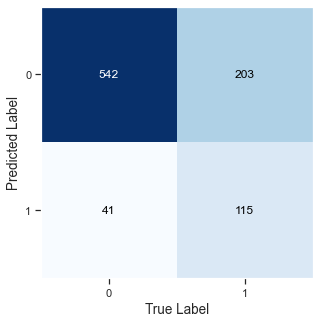

In [41]:
sns.set(rc={"figure.figsize":(5, 5)})

c_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(c_matrix)

plt.xlabel('True Label', fontsize=13.5)
plt.ylabel('Predicted Label', fontsize=13.5)

plt.savefig('Confusion Matrix No Oversample')
plt.show()

In [42]:
# Save Probabilities and threshold to compare in the localized

np.save('Models/Other Results/Probabilities LR Mortality 24-48h.npy', LR_classifier.predict_proba(X_test)[:,1])
np.save('Models/Other Results/Treshold LR Mortality 24-48h.npy', optimal_threshold)

# AIC (Akaike information criterion)

In [43]:
# This is true for linear models

# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * math.log(mse) + 2 * num_params
    return aic

# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * math.log(mse) + num_params * math.log(n)
    return bic

In [44]:
# number of parameters
num_params = len(LR_classifier.coef_) + 1
print('Number of parameters: %d' % (num_params))

# calculate the error
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

# calculate the aic
aic = calculate_aic(len(y_test), mse, num_params)
print('AIC: %.3f' % aic)

# calculate the bic
bic = calculate_bic(len(y_test), mse, num_params)
print('BIC: %.3f' % bic)


Number of parameters: 2
MSE: 0.271
AIC: -1173.010
BIC: -1163.403


# Final Summary

In [45]:
print('Accuracy     Balanced Accuracy     Precision     Recall     F1-score')
print('%6.2f' % accuracy_score(y_test,y_pred), '%16.2f' % balanced_accuracy_score(y_test,y_pred), '%17.2f' % precision_score(y_test,y_pred), '%12.2f' % recall_score(y_test,y_pred), '%11.2f' % f1_score(y_test,y_pred))
print()
print(' AUROC     Opt Threshold       AIC         BIC')
print( '%5.2f' % auc_roc, '%14.2f' % optimal_threshold, '%15.2f' % aic, '%11.2f' % bic)

Accuracy     Balanced Accuracy     Precision     Recall     F1-score
  0.73             0.73              0.36         0.74        0.49

 AUROC     Opt Threshold       AIC         BIC
 0.78           0.15        -1173.01    -1163.40


# Get Feature Importance

In [46]:
# get importance
importance = LR_classifier.coef_[0]

In [47]:
Df_scores_LR= pd.DataFrame(columns=list(X_test.columns))
Df_scores_LR.loc[0] = importance

In [48]:
Df_scores_LR.head()

,Age,HeartRate,TAD,Lactate,PaCO2,metHb,BE,AST/TGO,DHL,AlkalinePhosph,GGT,Lymphocytes,Platelets,Urea,Glasgow,Pneumothorax,MultiorganD,PolyneuroMyopathy,Shock,NIVUD
0,-0.376301,0.187653,-0.290437,0.238658,0.43973,0.200593,-0.356965,-0.344582,0.628704,-0.224573,0.355938,-0.147666,-0.241194,0.220292,0.257956,0.156703,0.285153,-0.194986,0.245748,-0.225825


In [49]:
print(Df_scores_LR)

        Age  HeartRate       TAD   Lactate    PaCO2     metHb        BE  \
0 -0.376301   0.187653 -0.290437  0.238658  0.43973  0.200593 -0.356965   

    AST/TGO       DHL  AlkalinePhosph       GGT  Lymphocytes  Platelets  \
0 -0.344582  0.628704       -0.224573  0.355938    -0.147666  -0.241194   

       Urea   Glasgow  Pneumothorax  MultiorganD  PolyneuroMyopathy     Shock  \
0  0.220292  0.257956      0.156703     0.285153          -0.194986  0.245748   

      NIVUD  
0 -0.225825  


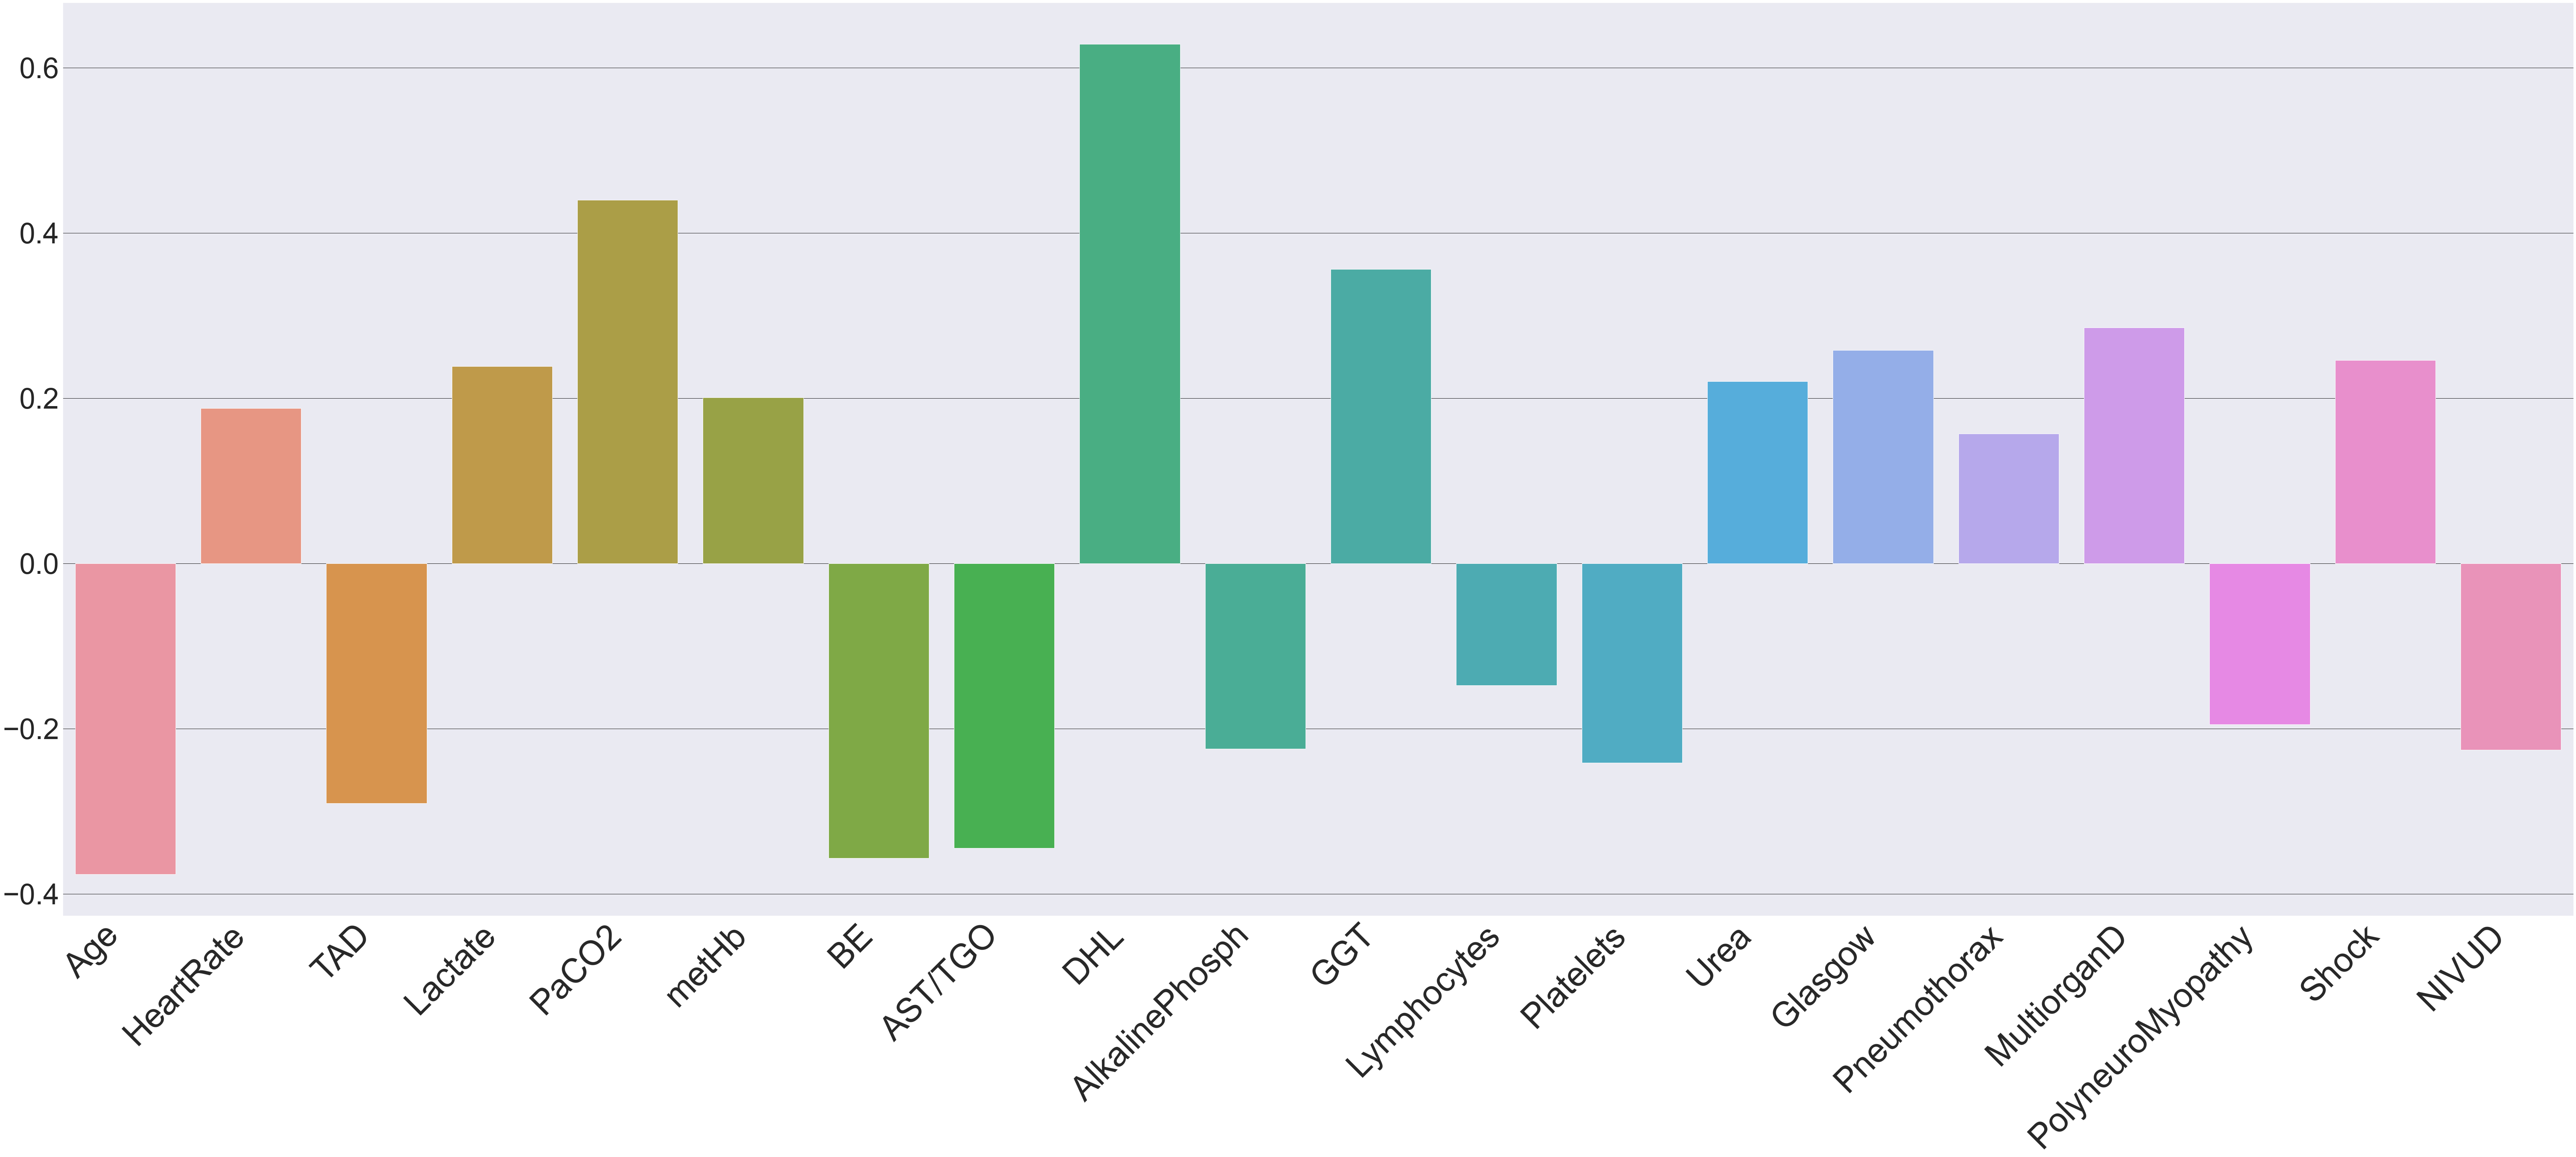

In [50]:
sns.set(rc={"figure.figsize":(100, 45)})

ax =sns.barplot(data=Df_scores_LR)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=95)

plt.yticks(fontsize = 80)
plt.grid(color = 'black', axis = 'y')

plt.tight_layout()
plt.savefig('Coefficient Importance')
plt.show()

# Save Model

In [51]:
# Saving Model
#filename = 'Models/LR Mortality 24-48h.sav'
#pickle.dump(LR_classifier, open(filename, 'wb'))

# Loading Model
#LR_classifier = pickle.load(open('Models/LR Mortality 24-48h.sav', 'rb'))

# Applying ADASYN

In [52]:
X_train_resampled = X_train
y_train_resampled = y_train

# Although the test data will not be oversampled, the varieble name will be different 
X_test_resampled = X_test
y_test_resampled = y_test

In [53]:
ada = ADASYN(sampling_strategy='auto', random_state=0, n_neighbors = 5)
s = SMOTE()

for i in range(0,1):   
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train_resampled, y_train_resampled)
    #X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)


In [54]:
# New prediction class distribution

print(Counter(y_train_resampled))

Counter({0.0: 1512, 1.0: 1422})


In [55]:
print(len(X_train_resampled))

2934


### Adasyn - Eliminating Features via Logistic Regression RFE

>10 0.6933 (0.0358)
>15 0.7091 (0.0338)
>20 0.7228 (0.0312)


>25 0.7228 (0.0312)
>30 0.7228 (0.0312)
>35 0.7228 (0.0312)
>40 0.7228 (0.0312)
>45 0.7228 (0.0312)
>50 0.7228 (0.0312)
>55 0.7228 (0.0312)
>60 0.7228 (0.0312)
>64 0.7228 (0.0312)


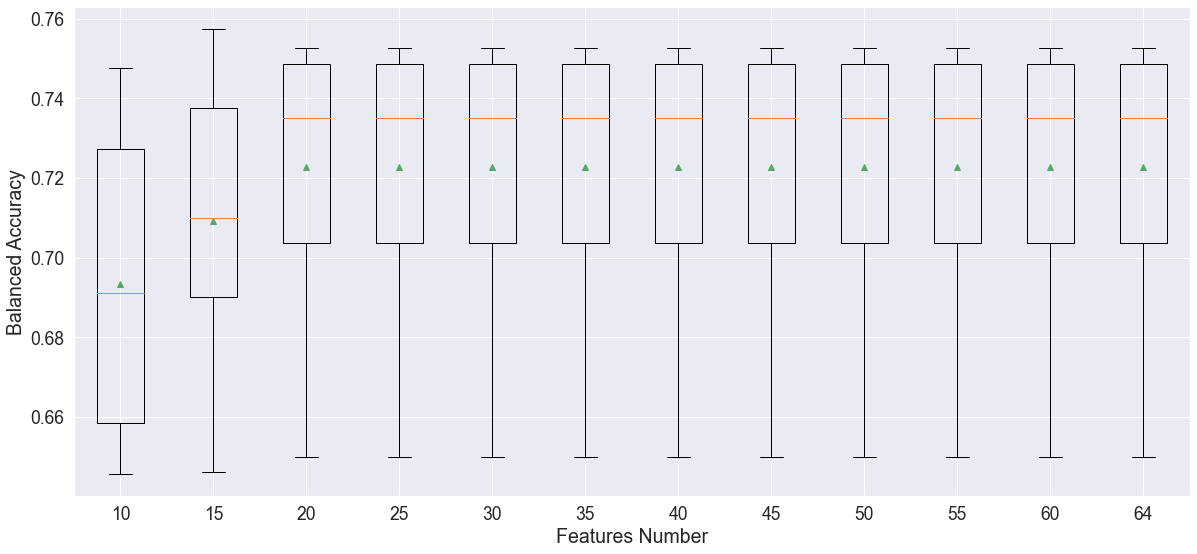

In [56]:
sns.set(rc={"figure.figsize":(20, 9)})

# get a list of models to evaluate
models = dict()
for i in [10,15,20,25,30,35,40,45,50,55,60,64]:
   # A machine learning model to selecting the features by eliminating the least important feature after recursively training
   rfe = RFE(estimator=LogisticRegression(max_iter=300), n_features_to_select=i)
   model = LogisticRegression(random_state = 0)
   models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate the models and store results
results, names = list(), list()
results_mean = list()
for name, model in models.items():
   # scoring='balanced_accuracy' because the data is unbalenced
   scores = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='balanced_accuracy', cv=10, n_jobs=-1, error_score='raise')
   results.append(scores)
   results_mean.append(scores.mean())
   names.append(name)
   print('>%s %.4f (%.4f)' % (name, scores.mean(), scores.std()))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

pyplot.ylabel('Balanced Accuracy', fontsize=19.5)
pyplot.xlabel('Features Number', fontsize=19.5)
pyplot.yticks(fontsize = 17.5)
pyplot.xticks(fontsize = 17.5)

#pyplot.savefig('RFE')
pyplot.show()

In [57]:
# Choose the best number of features as discovered from before 
# Here I choose a threshold of 0.02 of difference in accuracy

results_names = list(zip(results_mean[1:], names[1:]))

score_before = results_mean[0]
name_before = names[0]

for score,name in results_names[1:]:
    if score - score_before < 0.01:
        break
    else:
        score_before = score
        name_before = name

print('Number of features :', name_before)
print('Score :', score_before)

Number_of_features_resampled = int(name_before)

Number of features : 20
Score : 0.7228016933029907


In [58]:
# #Selecting the Best important features according to Logistic Regression

rfe_selector = RFE(estimator=LogisticRegression(max_iter=300),n_features_to_select = Number_of_features_resampled, step = 1)
rfe_selector.fit(X_train_resampled, y_train_resampled)
RFE_columns = X_train_resampled.columns[rfe_selector.get_support()]
print(RFE_columns)

Index(['Age', 'HeartRate', 'TAD', 'Lactate', 'PaCO2', 'metHb', 'BE', 'AST/TGO',
       'DHL', 'AlkalinePhosph', 'GGT', 'Lymphocytes', 'Platelets', 'Urea',
       'Glasgow', 'Pneumothorax', 'MultiorganD', 'PolyneuroMyopathy', 'Shock',
       'NIVUD'],
      dtype='object')


In [59]:
# Change X_train and X_test to just have the choosen columns
X_train_resampled = X_train_resampled[RFE_columns]
X_test_resampled = X_test_resampled[RFE_columns]

In [60]:
X_train_resampled.head()

,Age,HeartRate,TAD,Lactate,PaCO2,metHb,BE,AST/TGO,DHL,AlkalinePhosph,GGT,Lymphocytes,Platelets,Urea,Glasgow,Pneumothorax,MultiorganD,PolyneuroMyopathy,Shock,NIVUD
0,0.302783,-2.005568,-0.396855,-1.411539,2.039575,0.195661,-0.531748,-0.115509,-0.025627,-0.734278,-0.351211,2.852507,-0.178436,-0.084101,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,2.027421
1,-0.551803,0.693729,-1.548723,-0.640334,-0.252980,0.509726,-0.166020,-0.239192,0.262232,-0.610650,-0.720623,-1.334050,-1.390022,1.561824,0.480794,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
2,-0.257524,-0.214350,-0.627551,0.196574,-0.735469,0.445454,0.391556,-0.499841,0.049247,0.222635,-0.051309,0.534633,0.400938,0.392627,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
3,-2.136010,0.189980,-0.627551,0.196574,0.439768,-0.070718,0.931741,1.518986,1.467536,0.385894,0.415106,0.172422,-1.907574,1.140562,1.453192,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
4,-2.136010,-0.430734,-0.706206,1.101081,-0.811062,0.198899,-0.956473,-0.230956,-0.651393,-0.912344,0.236773,1.111138,-1.075785,0.476282,-0.946983,-0.165517,-0.176867,-0.204514,2.356885,-0.493237


In [61]:
X_test_resampled.head()

,Age,HeartRate,TAD,Lactate,PaCO2,metHb,BE,AST/TGO,DHL,AlkalinePhosph,GGT,Lymphocytes,Platelets,Urea,Glasgow,Pneumothorax,MultiorganD,PolyneuroMyopathy,Shock,NIVUD
330,0.946763,0.042494,-0.247203,-0.089917,-1.019654,0.421844,0.187647,0.105902,-1.020449,-0.831637,-1.807405,-0.531325,-0.277273,-0.835323,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
480,0.246140,-0.430734,-1.113908,0.196574,0.316140,0.502145,-0.178273,-0.381593,-0.176947,0.024155,-0.192087,-1.370606,1.448965,0.516432,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
2254,0.006481,-1.348681,-0.173553,-0.254908,0.728877,-1.242004,-0.858441,-0.462610,0.034335,-0.513772,0.236773,-1.263717,0.716262,0.160585,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,-0.493237
286,0.857195,0.650129,-1.030341,-0.254908,0.550626,1.446843,1.085981,-1.538325,-0.092194,0.489844,-0.180463,-0.357709,2.190127,-0.412990,-0.946983,-0.165517,-0.176867,-0.204514,-0.424289,2.027421
306,-2.290376,0.516820,-1.459362,1.036600,0.168645,1.274593,0.313275,-0.462610,-0.826154,-0.279873,0.378268,0.564613,-1.188998,1.204776,1.210850,-0.165517,-0.176867,4.889646,-0.424289,-0.493237


### Adasyn - Penalty and Cross Validation

In [62]:
classifier_list = ['standard', 'none', 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mean_accuracy_list = []

accuracies_df = pd.DataFrame()
n=0

for parameter in classifier_list:

    print(parameter, ':')

    if parameter == 'standard':
        classifier = LogisticRegression(max_iter=2000, random_state=0, solver='lbfgs', penalty='l2')
    elif parameter == 'none':
        classifier = LogisticRegression(max_iter=2000, random_state=0, penalty ='none', solver='saga')
    else:
        classifier = LogisticRegression(max_iter=2000, random_state=0, penalty ='elasticnet', solver='saga', l1_ratio=parameter)
    
    # scoring='balanced_accuracy' because the data is unbalenced
    all_accuracies_LR = cross_val_score(estimator=classifier, X=X_train_resampled, y=y_train_resampled, cv=10, scoring='balanced_accuracy')

    #print('cross_val_score: ', all_accuracies_LR)
    mean_accuracy_list.append(all_accuracies_LR.mean())
    print('Mean: ', all_accuracies_LR.mean())
    print('Standard deviation: ', all_accuracies_LR.std())
    print()

    accuracies_df[parameter] = all_accuracies_LR

standard :
Mean:  0.7228016933029907
Standard deviation:  0.031172579891588875

none :
Mean:  0.723480291021062
Standard deviation:  0.03123577377195876

0 :


Mean:  0.7228016933029907
Standard deviation:  0.031172579891588875

0.1 :
Mean:  0.7231538059790469
Standard deviation:  0.03130198830451122

0.2 :
Mean:  0.7231538059790469
Standard deviation:  0.03130198830451122

0.3 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

0.4 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

0.5 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

0.6 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

0.7 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

0.8 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

0.9 :
Mean:  0.7235059186551033
Standard deviation:  0.031466345618669095

1 :
Mean:  0.7235083809815094
Standard deviation:  0.03093125270794834



In [63]:
accuracies_df.head()

,standard,none,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,0.744616,0.747928,0.744616,0.744616,0.744616,0.744616,0.744616,0.744616,0.744616,0.744616,0.744616,0.744616,0.744616
1,0.700829,0.704325,0.700829,0.700829,0.700829,0.700829,0.700829,0.700829,0.700829,0.700829,0.700829,0.700829,0.697332
2,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687,0.752687
3,0.751529,0.754818,0.751529,0.751529,0.751529,0.751529,0.751529,0.751529,0.751529,0.751529,0.751529,0.751529,0.751529
4,0.732698,0.732698,0.732698,0.736219,0.736219,0.739740,0.739740,0.739740,0.739740,0.739740,0.739740,0.739740,0.739740


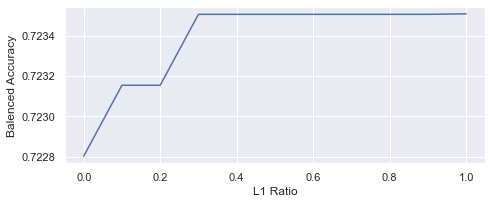

In [64]:
sns.set(rc={"figure.figsize":(20, 9)})

#l1 elasticnet l2 performance
accuracy_mean_Df = pd.DataFrame({'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'accuracy':mean_accuracy_list[2:],})

sns.set(rc={"figure.figsize":(7, 3)})
sns.lineplot(data = accuracy_mean_Df, x = 'l1_ratio', y = 'accuracy')

plt.ylabel('Balenced Accuracy')
plt.xlabel('L1 Ratio')

plt.tight_layout()
#plt.savefig('Accuracy with different l1_ratio')
plt.show()

In [65]:
l1_ratios = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

best_id = mean_accuracy_list[2:].index(max(mean_accuracy_list[2:]))

In [66]:
best_l1_ratio = l1_ratios[best_id]
print('best l1 ratio :', best_l1_ratio)

best l1 ratio : 1


In [67]:
accuracies_df_2 = pd.DataFrame({'standard':accuracies_df['standard'], 'saga none':accuracies_df['none'], best_l1_ratio:accuracies_df[best_l1_ratio]})

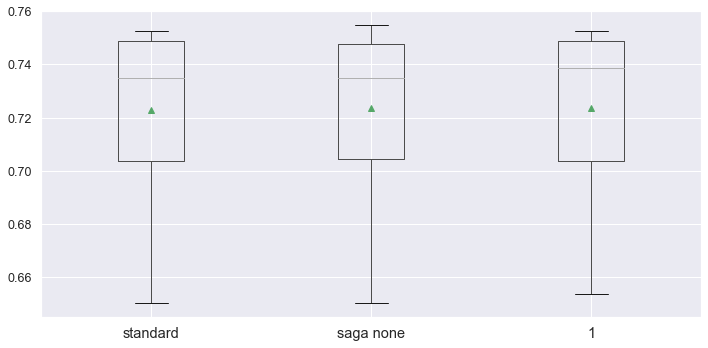

In [68]:
sns.set(rc={"figure.figsize":(10, 5)})

boxplot = accuracies_df_2.boxplot(accuracies_df_2.columns.tolist(), showmeans=True)

pyplot.yticks(fontsize = 12.5)
pyplot.xticks(fontsize = 14.5)

plt.tight_layout()
#plt.savefig('Accuracy with different solver and for no penalty')
plt.show()

In [69]:
# Performs one-way ANOVA test
# tests the null hypothesis that two or more groups have the same population mean
# if the p value is greater than 0.05, the null hypothesis is considered to be true

f_oneway_result = f_oneway(accuracies_df_2['standard'], accuracies_df_2['saga none'], accuracies_df_2[best_l1_ratio])

### Adasyn - Logistic Regression Model, Cost and parameters

In [70]:
# Here with the best parameter

if f_oneway_result.pvalue > 0.05:
    print('standard')
    LR_classifier_resampled = LogisticRegression(max_iter=2000, random_state=0, solver='lbfgs', penalty="l2")
else:
    print('l1 ratio')
    LR_classifier_resampled = LogisticRegression(max_iter=2000, random_state=0, penalty ='elasticnet', solver='saga', l1_ratio=parameter)
    
LR_classifier_resampled.fit(X_train_resampled, y_train_resampled)

standard


LogisticRegression(max_iter=2000, random_state=0)

In [72]:
# Get cost function plot

loss_resampled = []
coefs1_resampled = []
coefs2_resampled = []

for i in range(1,26):

    LR_classifier_cost_resampled = LogisticRegression(max_iter=i, random_state=0, solver='lbfgs', penalty="l2")
    LR_classifier_cost_resampled.fit(X_train_resampled, y_train_resampled)

    loss_resampled.append(log_loss(y_train_resampled, LR_classifier_cost_resampled.predict_proba(X_train_resampled)))
    coefs1_resampled.append(LR_classifier_cost_resampled.coef_[0][0])
    coefs2_resampled.append(LR_classifier_cost_resampled.coef_[0][3])

C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\nunop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-l

[0.5677313315152848, 0.5480679899130434, 0.5341801135737025, 0.5310367165160754, 0.5273606322651638, 0.5271151021182706, 0.5269725279452455, 0.526938901329355, 0.5269366100646691, 0.5269357166198781, 0.5269352966563399, 0.526934710780924, 0.5269345750312809, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772, 0.5269345316674772]


<AxesSubplot:>

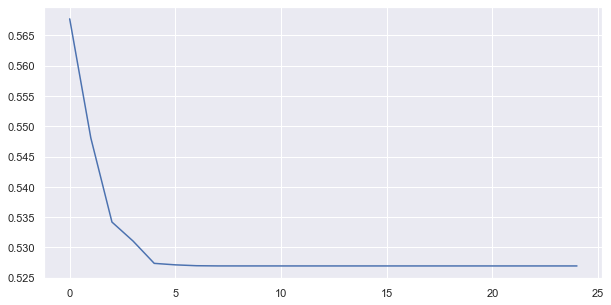

In [73]:
sns.set(rc={"figure.figsize":(10, 5)})

print(loss_resampled)
sns.lineplot(loss_resampled)

[-0.25631120281998243, -0.24687878596065516, -0.2762067796908426, -0.30969378934162195, -0.39240568054831126, -0.38633700695661977, -0.39752292888790636, -0.3974601704200882, -0.3960635448597954, -0.39523270750565564, -0.39504108718162073, -0.3950690387140939, -0.39504606706059286, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808, -0.3951030453865808]


<AxesSubplot:>

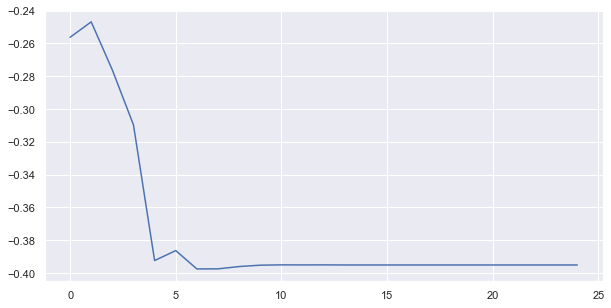

In [74]:
# coefficient 1 evolution plot

print(coefs1_resampled)
sns.lineplot(coefs1_resampled)

[0.2663518415611355, 0.24691877265033693, 0.2587710542702842, 0.2873201199646874, 0.32968687078526865, 0.3282353119300884, 0.32156642335779184, 0.31296238094406154, 0.30741901662015386, 0.3081309593234662, 0.3086191942972614, 0.3090355590277462, 0.3091422057657509, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244, 0.30912004059144244]


<AxesSubplot:>

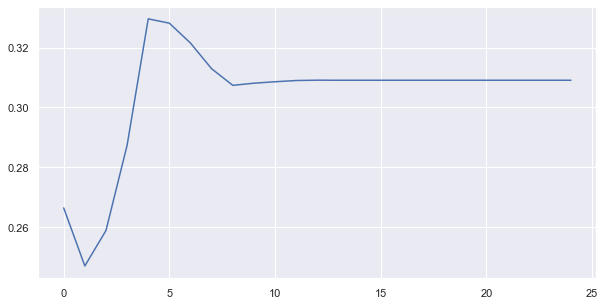

In [75]:
# coefficient 2 evolution plot

print(coefs2_resampled)
sns.lineplot(coefs2_resampled)

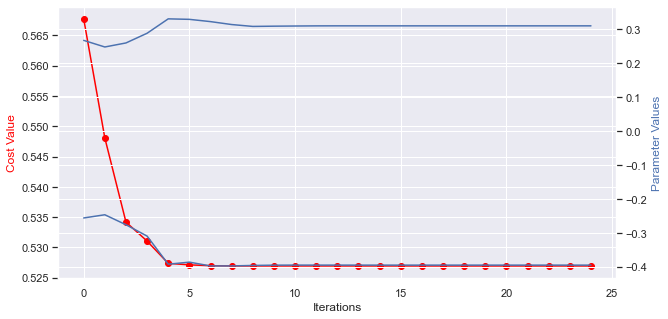

In [76]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(loss_resampled, 'o-', color="red" )
ax2.plot(coefs1_resampled, color='b')
ax2.plot(coefs2_resampled, color='b')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost Value', color='red')
ax2.set_ylabel('Parameter Values', color='b')

#plt.savefig('Cost and Parameters Evolution')
plt.show()

In [77]:
# Final cross validation performance
cv = StratifiedKFold(10)

all_accuracies_RF = cross_val_score(estimator=LR_classifier_resampled, X=X_train_resampled, y=y_train_resampled, cv=cv, scoring='accuracy')
all_balanced_accuracies_RF = cross_val_score(estimator=LR_classifier_resampled, X=X_train_resampled, y=y_train_resampled, cv=cv, scoring='balanced_accuracy')
all_precisions_RF = cross_val_score(estimator=LR_classifier_resampled, X=X_train_resampled, y=y_train_resampled, cv=cv, scoring='precision')
all_recalls_RF = cross_val_score(estimator=LR_classifier_resampled, X=X_train_resampled, y=y_train_resampled, cv=cv, scoring='recall')
all_f1_RF = cross_val_score(estimator=LR_classifier_resampled, X=X_train_resampled, y=y_train_resampled, cv=cv, scoring='f1')

print('     Accuracy')
print('%6.2f' % all_accuracies_RF.mean(), 'std','%3.2f' % all_accuracies_RF.std())
print()
print('Balanced Accuracy')
print('%6.2f' % all_balanced_accuracies_RF.mean(), 'std','%3.2f' % all_balanced_accuracies_RF.std())
print()
print('    Precision')
print('%6.2f' % all_precisions_RF.mean(), 'std','%3.2f' % all_precisions_RF.std())
print()
print('     Recall')
print('%6.2f' % all_recalls_RF.mean(), 'std','%3.2f' % all_recalls_RF.std())
print()
print('    F1-score')
print('%6.2f' % all_f1_RF.mean(), 'std','%3.2f' % all_f1_RF.std())
print()

     Accuracy
  0.72 std 0.03

Balanced Accuracy
  0.72 std 0.03

    Precision
  0.72 std 0.03

     Recall
  0.70 std 0.06

    F1-score
  0.71 std 0.04



### Adasyn - Performance on Test Dataset

In [78]:
# Here we have to use LR_classifier.predict_proba(X_test)[:,1] and not y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test_resampled, LR_classifier_resampled.predict_proba(X_test_resampled)[:,1], pos_label=1)
auc_roc = metrics.auc(fpr, tpr)
auc_roc

0.7728790225434521

In [79]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('optimal idx :', optimal_idx)
print('optimal threshold :', optimal_threshold)
print('tpr optimal idx:', tpr[optimal_idx])
print('fpr optimal idx:', fpr[optimal_idx])

optimal idx : 142
optimal threshold : 0.42905683109625303
tpr optimal idx: 0.7564102564102564
fpr optimal idx: 0.3221476510067114


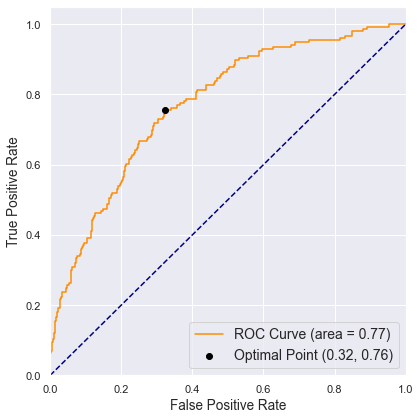

In [80]:
sns.set(rc={"figure.figsize":(6, 6)})

plt.plot(fpr, tpr, color='darkorange',
         label='ROC Curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter([fpr[optimal_idx]], [tpr[optimal_idx]], color="black", zorder=5,
         label='Optimal Point (%0.2f, %0.2f)' % (fpr[optimal_idx], tpr[optimal_idx]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=13.5)
plt.ylabel('True Positive Rate', fontsize=13.5)
plt.legend(loc="lower right", fontsize=14)

plt.tight_layout()
plt.savefig('ROC Curve Oversample')
plt.show()

In [81]:
# the predict function uses a 0.5 cut treshold
#y_pred = LR_classifier.predict(X_test_resampled)

# In this way we can define a treshold
# It is defined by the optimal threshold

y_pred_resampled = (LR_classifier_resampled.predict_proba(X_test_resampled)[:,1] >= optimal_threshold).astype(bool)

In [82]:
# Test Performance

print(confusion_matrix(y_test_resampled,y_pred_resampled))
print(classification_report(y_test_resampled,y_pred_resampled))
print('accuracy_score: ', accuracy_score(y_test_resampled, y_pred_resampled))

[[505 240]
 [ 38 118]]
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.78       745
         1.0       0.33      0.76      0.46       156

    accuracy                           0.69       901
   macro avg       0.63      0.72      0.62       901
weighted avg       0.83      0.69      0.73       901

accuracy_score:  0.6914539400665927


In [83]:
print(' balanced_accuracy_score: ', balanced_accuracy_score(y_test_resampled, y_pred_resampled))

 balanced_accuracy_score:  0.7171313027017725


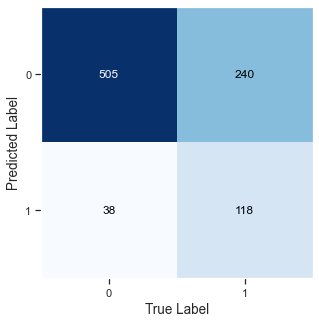

In [84]:
sns.set(rc={"figure.figsize":(5, 5)})

c_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)
plot_confusion_matrix(c_matrix)

plt.xlabel('True Label', fontsize=13.5)
plt.ylabel('Predicted Label', fontsize=13.5)

plt.savefig('Confusion Matrix Oversample')
plt.show()

In [85]:
# Save Probabilities and threshold to compare in the localized

np.save('Models/Other Results/Probabilities LR Mortality 24-48h Adasyn.npy', LR_classifier_resampled.predict_proba(X_test)[:,1])
np.save('Models/Other Results/Treshold LR Mortality 24-48h Adasyn.npy', optimal_threshold)

### Adasyn - AIC (Akaike information criterion)

In [86]:
# This is true for linear models
# Just if I don't run the before

# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * math.log(mse) + 2 * num_params
    return aic

# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * math.log(mse) + num_params * math.log(n)
    return bic

In [87]:
# number of parameters
num_params = len(LR_classifier_resampled.coef_) + 1
print('Number of parameters: %d' % (num_params))

# calculate the error
mse = mean_squared_error(y_test_resampled, y_pred_resampled)
print('MSE: %.3f' % mse)

# calculate the aic
aic = calculate_aic(len(y_test_resampled), mse, num_params)
print('AIC: %.3f' % aic)

# calculate the bic
bic = calculate_bic(len(y_test_resampled), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 2
MSE: 0.309
AIC: -1055.472
BIC: -1045.865


### Adasyn - Final Summary

In [88]:
print('Accuracy     Balanced Accuracy     Precision     Recall     F1-score')
print('%6.2f' % accuracy_score(y_test_resampled,y_pred_resampled), '%16.2f' % balanced_accuracy_score(y_test_resampled,y_pred_resampled), '%17.2f' % precision_score(y_test_resampled,y_pred_resampled), '%12.2f' % recall_score(y_test_resampled,y_pred_resampled), '%11.2f' % f1_score(y_test_resampled,y_pred_resampled))
print()
print(' AUROC     Opt Threshold       AIC         BIC')
print( '%5.2f' % auc_roc, '%14.2f' % optimal_threshold, '%15.2f' % aic, '%11.2f' % bic)

Accuracy     Balanced Accuracy     Precision     Recall     F1-score
  0.69             0.72              0.33         0.76        0.46

 AUROC     Opt Threshold       AIC         BIC
 0.77           0.43        -1055.47    -1045.86


### Adasyn - Get Feature Importance

In [89]:
# get importance
importance_resampled = LR_classifier_resampled.coef_[0]

In [90]:
Df_scores_LR_resampled= pd.DataFrame(columns=list(X_test_resampled.columns))
Df_scores_LR_resampled.loc[0] = importance_resampled

In [91]:
Df_scores_LR_resampled.head()

,Age,HeartRate,TAD,Lactate,PaCO2,metHb,BE,AST/TGO,DHL,AlkalinePhosph,GGT,Lymphocytes,Platelets,Urea,Glasgow,Pneumothorax,MultiorganD,PolyneuroMyopathy,Shock,NIVUD
0,-0.395103,0.22926,-0.373861,0.30912,0.513115,0.244993,-0.366525,-0.437988,0.663677,-0.327605,0.467101,-0.224203,-0.302475,0.193263,0.270054,0.1547,0.197398,-0.159889,0.195107,-0.281203


In [92]:
print(Df_scores_LR_resampled)

        Age  HeartRate       TAD  Lactate     PaCO2     metHb        BE  \
0 -0.395103    0.22926 -0.373861  0.30912  0.513115  0.244993 -0.366525   

    AST/TGO       DHL  AlkalinePhosph       GGT  Lymphocytes  Platelets  \
0 -0.437988  0.663677       -0.327605  0.467101    -0.224203  -0.302475   

       Urea   Glasgow  Pneumothorax  MultiorganD  PolyneuroMyopathy     Shock  \
0  0.193263  0.270054        0.1547     0.197398          -0.159889  0.195107   

      NIVUD  
0 -0.281203  


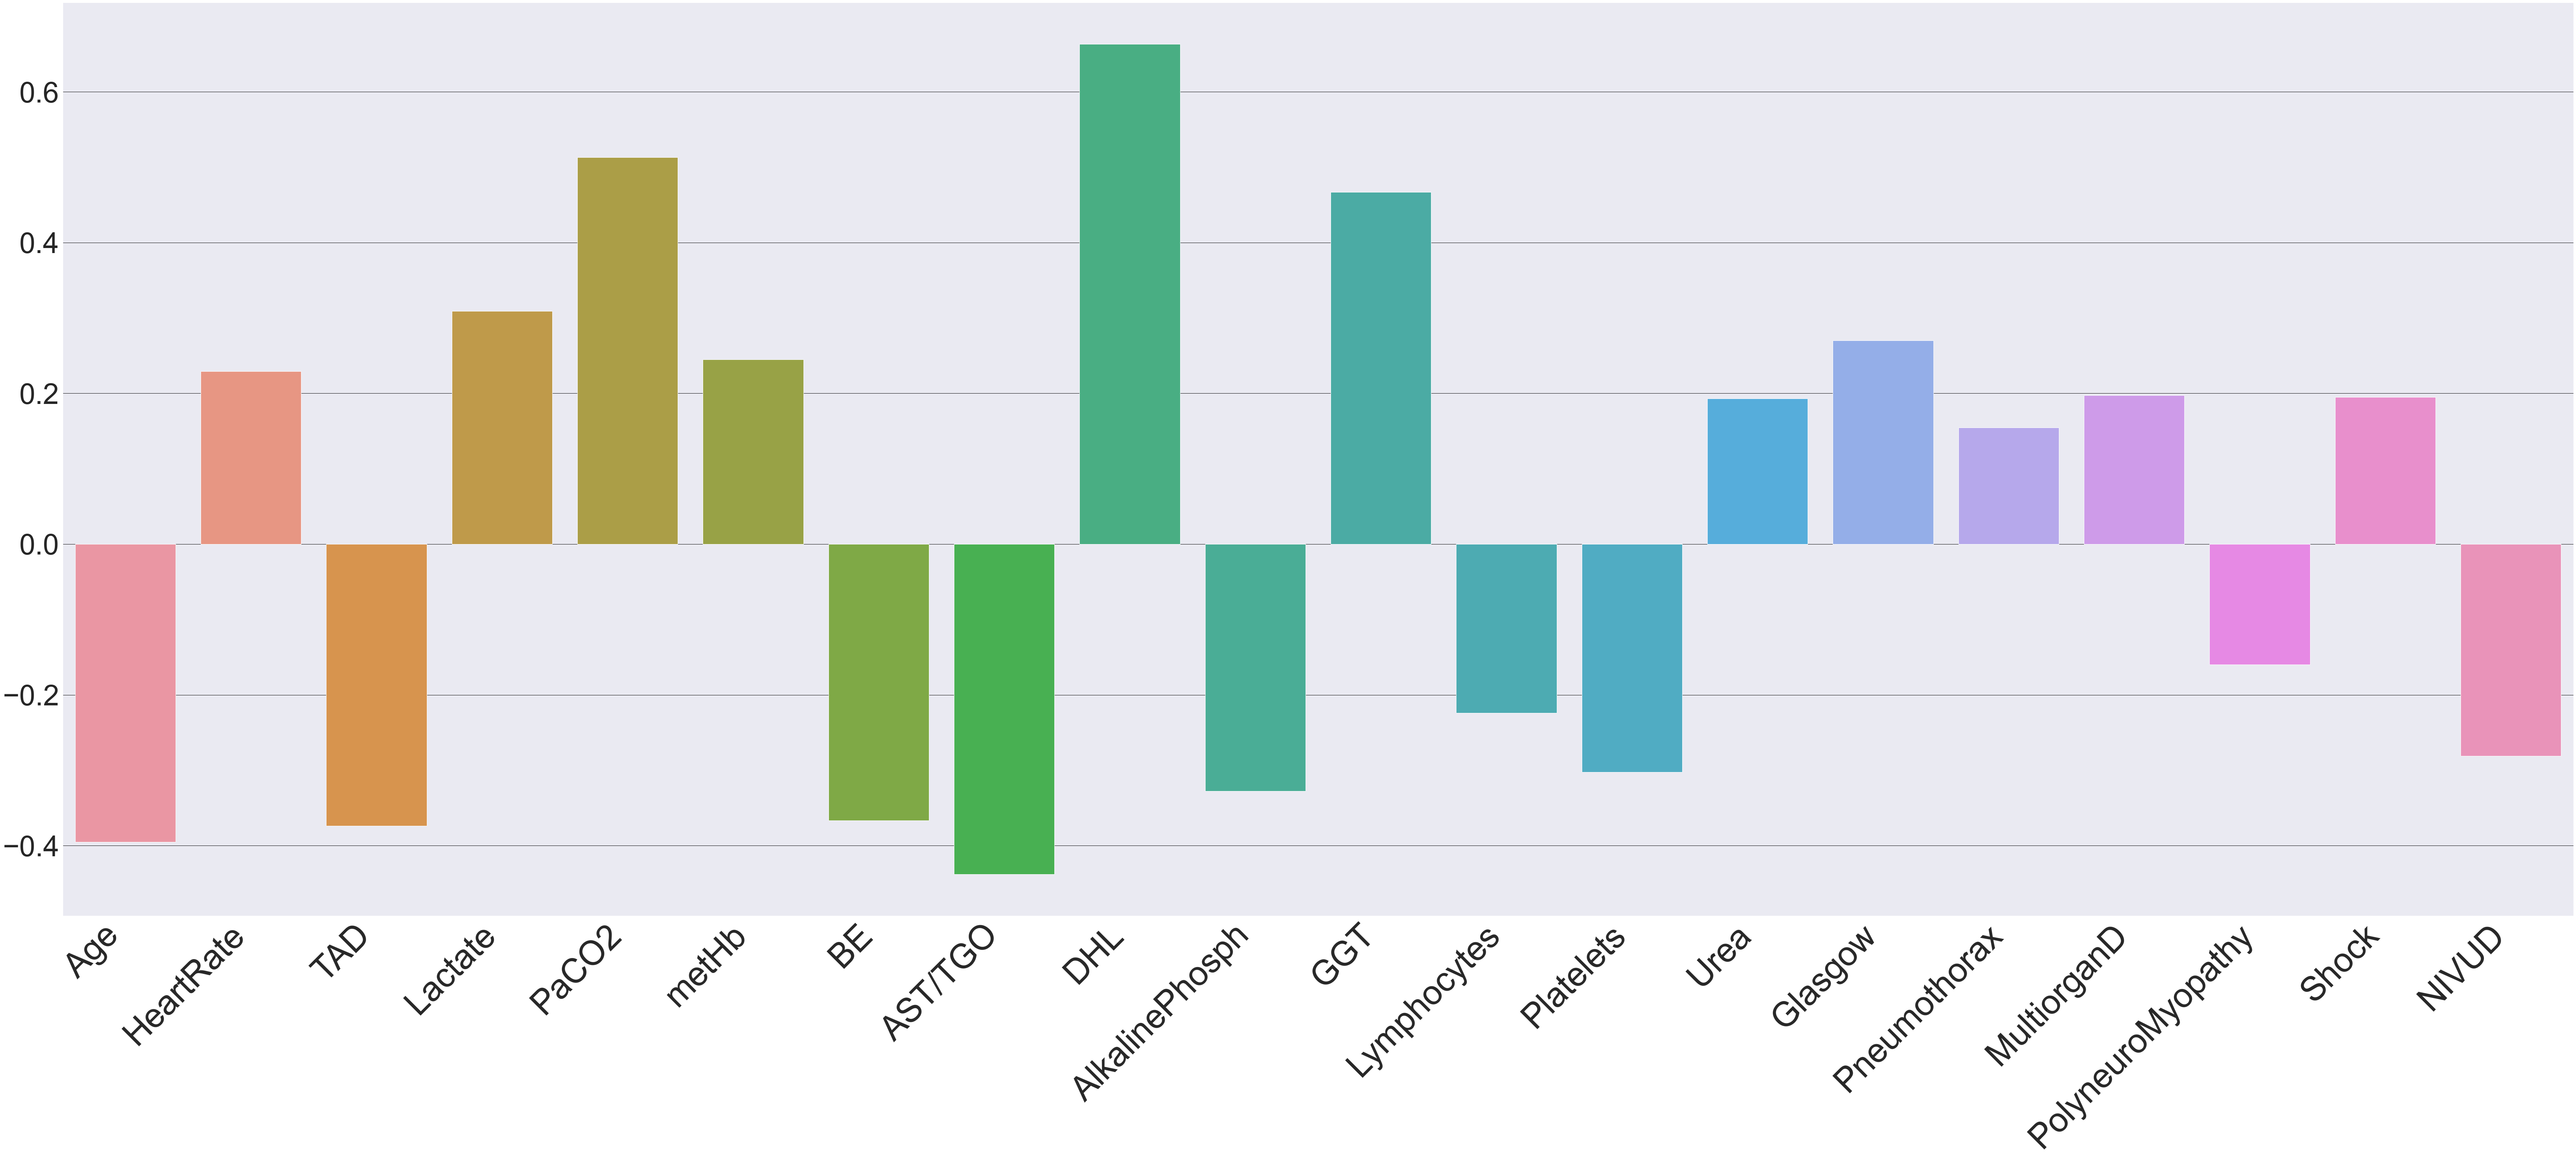

In [ ]:
sns.set(rc={"figure.figsize":(100, 45)})

ax =sns.barplot(data=Df_scores_LR_resampled)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=95)

plt.yticks(fontsize = 80)
plt.grid(color = 'black', axis = 'y')

plt.tight_layout()
plt.savefig('Coefficient Importance ADASYN')
plt.show()

### Adasyn - Saving Model

In [ ]:
# Saving Model
#filename = 'Models/LR Mortality 24-48h Adasyn.sav'
#pickle.dump(LR_classifier_resampled, open(filename, 'wb'))

# Loading Model
#LR_classifier_resampled = pickle.load(open('Models/LR Mortality 24-48h Adasyn.sav', 'rb'))